# Multiple Linear Regression

###### 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df["age"] = np.random.randint(100 , size = 545)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,age
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,98
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,86
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,59
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,84
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,20


In [6]:
x_features = ["area","bedrooms","bathrooms","stories","age"]

n = len(x_features)

x_train_f0 = np.array([df[x_features[i]] for i in range(n)])
y_train_f0 = np.array(df["price"])

m = len(x_train_f0[0])

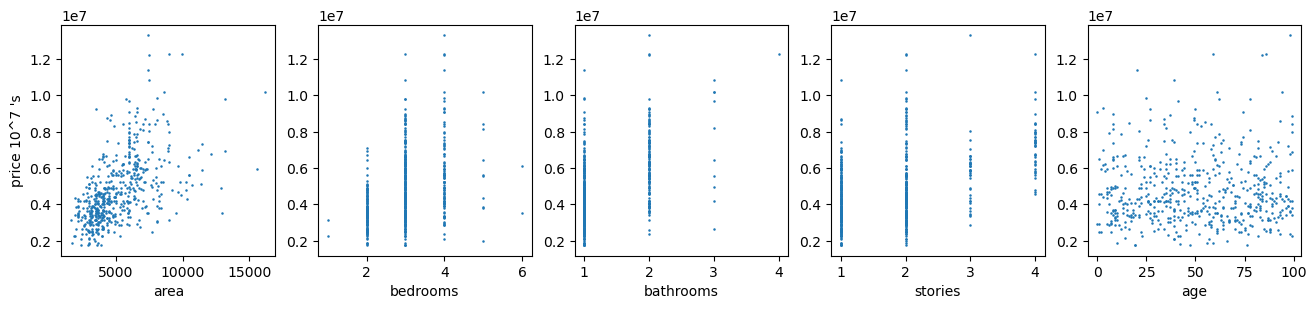

In [7]:
fig , ax = plt.subplots(1,n , figsize = (16,3))

for i in range(n):
    ax[i].plot(x_train_f0[i],y_train_f0,'o' , ms= 0.8)
    ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("price 10^7 's")
plt.show()

### Mean normalization normal way

In [8]:
x_train = []

def mean_norm(arr):

        avg = np.sum(arr)/len(arr)
        
        print(avg)

        minimum = min(arr)
        maximum = max(arr)

        new_arr = (arr - avg)/(maximum-minimum)
        
        return new_arr

for i in range(n):
    arr = x_train_f0[i]
    
    x_train.append(mean_norm(arr))
    
x_train = np.array(x_train)
x_train

5150.54128440367
2.9651376146788992
1.2862385321100918
1.8055045871559634
49.97798165137615


array([[ 0.15597654,  0.26181847,  0.33054699, ..., -0.10519184,
        -0.15398909, -0.08938428],
       [ 0.20697248,  0.20697248,  0.00697248, ..., -0.19302752,
         0.00697248,  0.00697248],
       [ 0.23792049,  0.90458716,  0.23792049, ..., -0.09541284,
        -0.09541284, -0.09541284],
       [ 0.39816514,  0.73149847,  0.0648318 , ..., -0.26850153,
        -0.26850153,  0.0648318 ],
       [ 0.48507089,  0.36385877,  0.0911315 , ..., -0.31290891,
        -0.31290891,  0.26284867]])

In [9]:
y_train = np.array(mean_norm(y_train_f0))

4766729.247706422


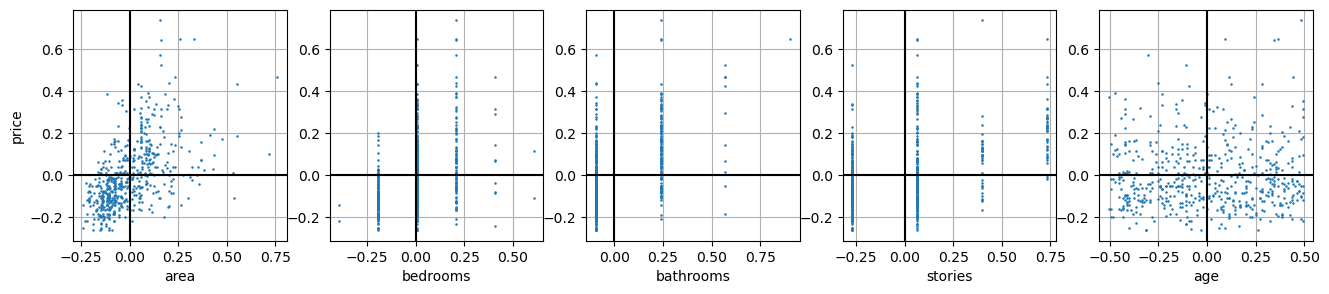

In [10]:
fig , ax = plt.subplots(1,n, figsize = (16,3))


for i in range(n):
    ax[i].plot(x_train[i],y_train,'o',ms=0.8)
    ax[i].set_xlabel(x_features[i])
    
    ax[i].grid(True, which  = 'both')
    ax[i].axhline(y=0,color = 'k')
    ax[i].axvline(x=0,color = 'k')
    
    
ax[0].set_ylabel("price")

plt.show()

## Zscore normalization clever way

In [11]:
def zscore_norm(X):
    
    mu = np.mean(X , axis = 0)      #shape n
    sigma = np.std(X , axis = 0)     #shape n
    
    X_norm = (X-mu)/sigma
    
    return X_norm,mu,sigma

In [12]:
x_train,x_avg,x_std = zscore_norm(np.transpose(x_train_f0))
x_train,x_avg,x_std

(array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.69188916],
        [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  1.26911081],
        [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  0.31785951],
        ...,
        [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -1.09140168],
        [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -1.09140168],
        [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013,  0.91679551]]),
 array([5.15054128e+03, 2.96513761e+00, 1.28623853e+00, 1.80550459e+00,
        4.99779817e+01]),
 array([2.16814915e+03, 7.37386427e-01, 5.02008423e-01, 8.66696233e-01,
        2.83836668e+01]))

In [13]:
y_train,y_avg,y_std = zscore_norm(np.transpose(y_train_f0))

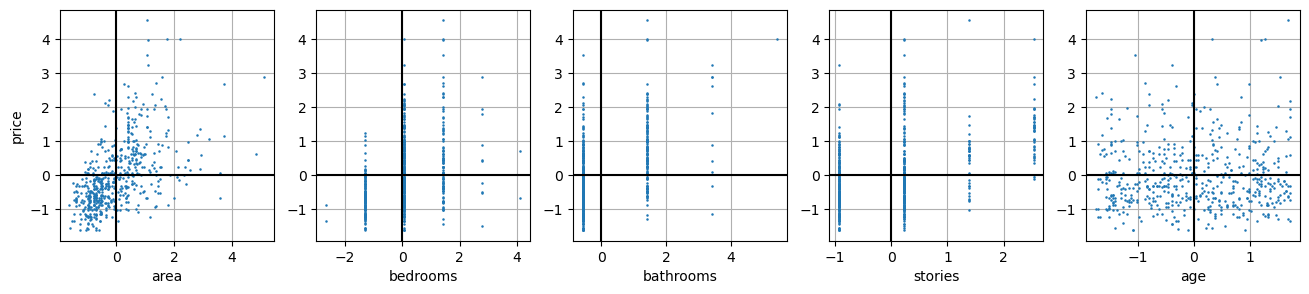

In [14]:
fig , ax = plt.subplots(1,n, figsize = (16,3))


for i in range(n):
    ax[i].plot(x_train[:,i],y_train,'o',ms=0.8)
    ax[i].set_xlabel(x_features[i])
    
    ax[i].grid(True, which  = 'both')
    ax[i].axhline(y=0,color = 'k')
    ax[i].axvline(x=0,color = 'k')
    
    
ax[0].set_ylabel("price")

plt.show()

## Model

In [16]:
w_init = np.ones(n) 
b_init = 1


array([1., 1., 1., 1., 1.])

#### cost function

In [20]:
def cost_func(m ,n ,X ,Y ,w ,b):
    
    J = (1/2*m) * np.sum(  [(np.dot(w,X[i]) + b - Y[i])**2  for i in range(m)])
         
    return J 
      

In [21]:
cost = cost_func(m,n,x_train,y_train,w_init,b_init)
cost 

987972.3852271697

#### gradient

In [28]:
def calculate_gradient(m ,n ,X ,Y ,w ,b):
    
    gra_w = np.array([(1/m) * np.sum([  (np.dot(w,X[i]) + b - Y[i]) * X[i][j]  for i in range(m)  ]) for j in range(n)])
     
    dir_b = (1/m) * np.sum([  (np.dot(w,X[i]) + b - Y[i])   for i in range(m)  ])
    
    return gra_w , dir_b
    
        

In [79]:
def gradient_descent(m ,n ,X ,Y ,w ,b ,alpha ,max_iter):
    
    cost = []
    
    for i in range(max_iter):
        
        J = cost_func(m ,n ,X ,Y ,w ,b)
        cost.append(J)
        
        gra_w , dir_b = calculate_gradient(m ,n ,X ,Y ,w ,b)
    
        w = w - alpha * gra_w
        b = b - alpha * dir_b
        
    return w,b,np.array(cost)    

In [102]:
w_predict = [] 
b_predict = []
cost = []

for al in [0.0001 , 0.001 , 0.01, 0.1 , 1 ,10]:
    w , b , c = gradient_descent(m,n, x_train , y_train , w_init , b_init ,al , 100)
    
    w_predict.append(w)
    b_predict.append(b)
    cost.append(c)
    
    

In [103]:
w_predict,b_predict

([array([0.99099796, 0.98453211, 0.98513526, 0.98593629, 0.98877998]),
  array([0.91655007, 0.85713756, 0.8633031 , 0.87040466, 0.89352897]),
  array([0.56216973, 0.27230017, 0.34097047, 0.35657284, 0.32903925]),
  array([ 0.44085863,  0.0770903 ,  0.32596403,  0.24641451, -0.02730612]),
  array([ 0.4407755 ,  0.07656095,  0.32650096,  0.24650391, -0.02750431]),
  array([1.95320561e+123, 3.81499586e+123, 3.70879618e+123, 3.57870961e+123,
         6.53154551e+122])],
 [0.9900493386913705,
  0.9047921471137096,
  0.3660323412732299,
  2.656139888790853e-05,
  3.0291773167295553e-16,
  -1.6425460218500557e+108])

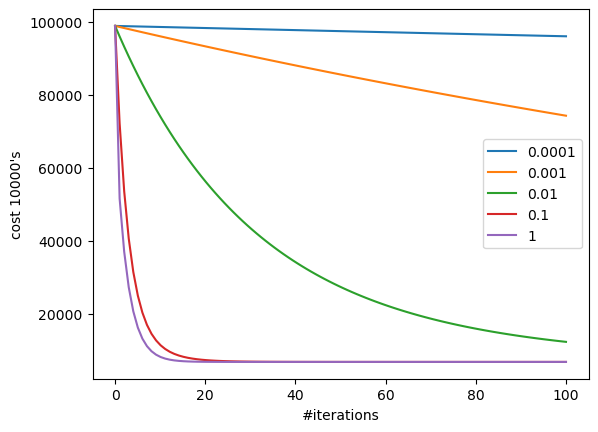

In [114]:
x = np.linspace(0,100,100)

als = [0.0001 , 0.001 , 0.01, 0.1 , 1,10]

for i in range(len(cost)-1):
    y = cost[i]/10
    plt.plot(x , y , label = "%s" % als[i])
    

plt.xlabel("#iterations")
plt.ylabel("cost 10000's")

plt.legend()
plt.show()

### check model

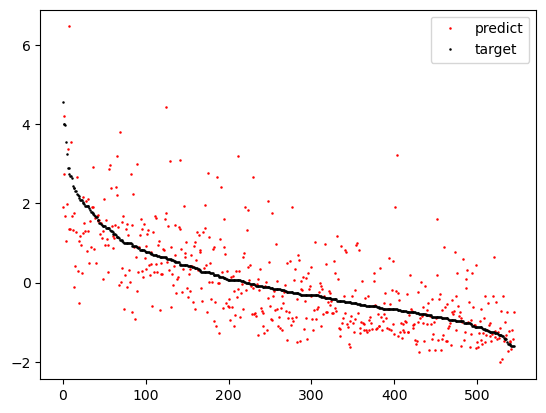

In [134]:
#for alpha = 1   (learrning rate)

x = x_train
w = w_predict[4]
b = b_predict[4]

predict = np.array([np.dot(w,x[i])+b for i in range(m)])
target = y_train
    
_ = np.arange(0,545,1)
   
plt.plot(_,predict , "o",ms = 0.8,color = "red" , label = "predict")
plt.plot(_,target ,"o",ms = 0.8 , color = "black" , label = "target")


plt.legend()
plt.show()
